In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных/')

#Задание 1

In [ ]:
from pandas import read_csv
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import pandas as pd

In [ ]:
filename='seeds_dataset.txt'
names=['area A','perimeter P','compactness','length of ker',
       'width of ker', 'asymmetry coeff', 'length of ker groove','class']
df=read_csv(filename,sep='\t', error_bad_lines=False,names=names)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df=df.rename(columns=lambda x: x.replace(' ','_'))

In [ ]:
df['class_name']=np.where(df['class']==1,'Кама',(np.where(df['class']==2,'Роза','Канадская')))

In [ ]:
df.class_name = df.class_name.astype('category')

In [ ]:
set_option('display.width',100) # задается ширина экрана с выводом
set_option('precision',2)       # задается количество знаков после запятой

In [ ]:
df.describe()

,area_A,perimeter_P,compactness,length_of_ker,width_of_ker,asymmetry_coeff,length_of_ker_groove,class
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14.85,14.56,0.87,5.63,3.26,3.70,5.41,2.00
std,2.91,1.31,0.02,0.44,0.38,1.50,0.49,0.82
min,10.59,12.41,0.81,4.90,2.63,0.77,4.52,1.00
25%,12.27,13.45,0.86,5.26,2.94,2.56,5.04,1.00
50%,14.36,14.32,0.87,5.52,3.24,3.60,5.22,2.00
75%,17.30,15.71,0.89,5.98,3.56,4.77,5.88,3.00
max,21.18,17.25,0.92,6.67,4.03,8.46,6.55,3.00


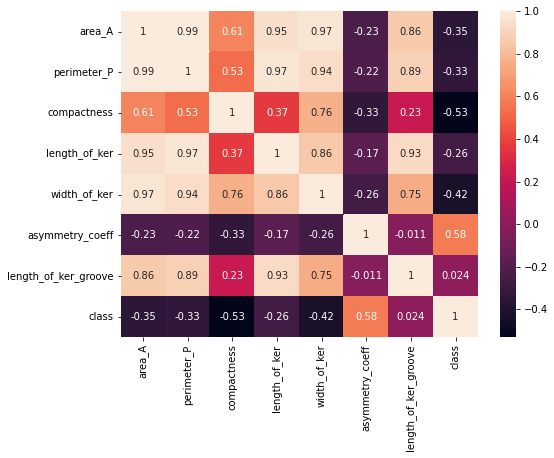

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# корреляция штоли
# Пирсона - для нормального распределеня
# Спирмана - для ненормального распределеня
# Кэндала - для ненормального распределеня

In [ ]:
df.skew()
# если показатель ассиметрии находится в пределах std отклонения, то
# считаем, что распределение нормальное

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length    0.31
sepal_width     0.33
petal_length   -0.27
petal_width    -0.10
dtype: float64

In [ ]:
df.kurtosis()
# тоже сравниваем со std отклонением, если в его пределах, то
# распределение нормальное
# если меньше 0, то приплюснутая, если больше 0, товытянутая штоли

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length   -0.55
sepal_width     0.29
petal_length   -1.40
petal_width    -1.34
dtype: float64

In [ ]:
df.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


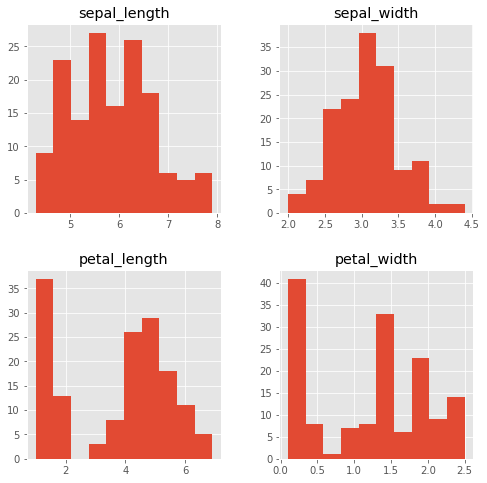

In [ ]:
df.hist(figsize=(8,8))
plt.show()

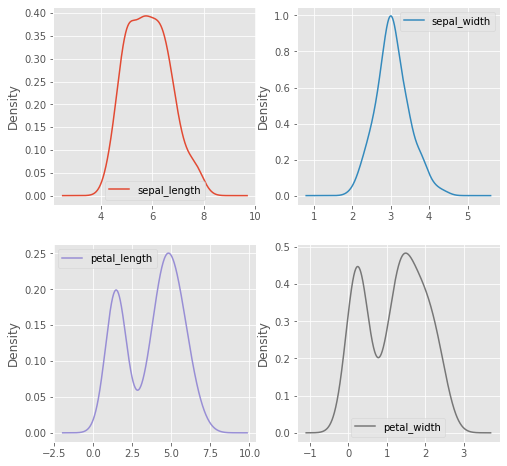

In [ ]:
df.plot(kind='kde',subplots=True, layout=(2,2),sharex=False,figsize=(8,8))
plt.show()
# анализ распределения: нижние красивей, но ненормальней

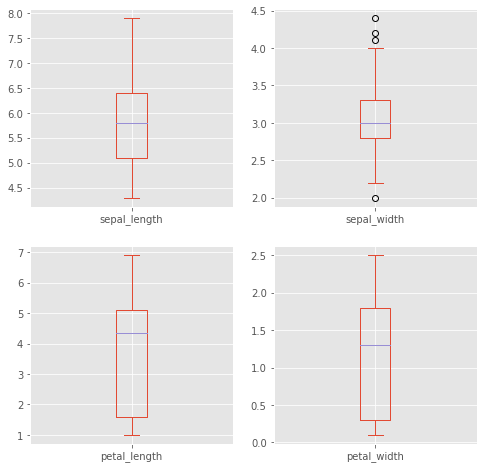

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(8,8))
plt.show()
# ящик с усами 2 вершины не ловит

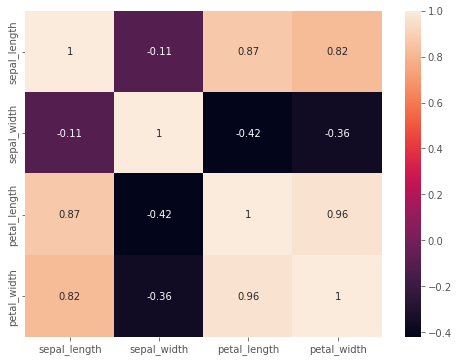

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

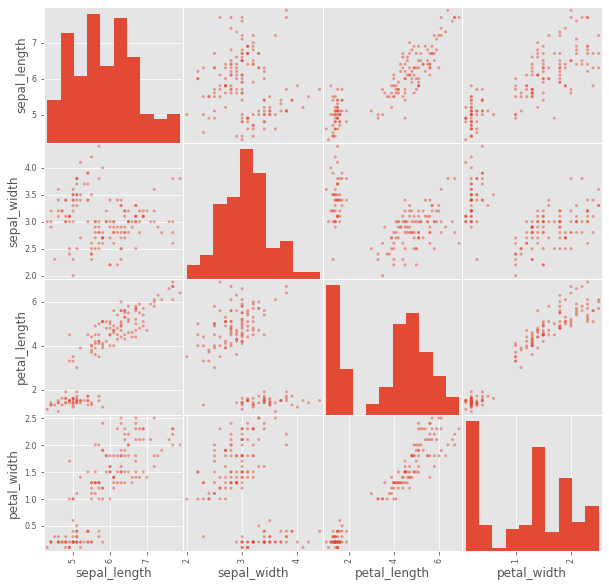

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,10))
plt.show()
# наблюдается прямая связь в квадратах: строка/столбец : 1/3, 1/4, 3/1, 3/4, 4/1, 4/3,
# силя связи на графике и в корреляционной матрице сопоставимы

#Задание 2

# **Раздел 1. Критерий Шапиро-Уилка. Проверка нормальности распределения параметра sepal_width**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
81,5.5,2.4,3.7,1.0,Iris-versicolor
129,7.2,3.0,5.8,1.6,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
134,6.1,2.6,5.6,1.4,Iris-virginica


**3. Постройте гистограмму для логарифма численности населения городов, воспользовавшись функцией log10 из модуля numpy для логарифмирования и функцией hist() из модуля matplotlib.pyplot. Сделайте предположение о нормальности прологарифмированных**

**пояснение:** Если данные явно несимметричны, то заменяют каждое значение приведенного набора данных логарифмом этого значения с целью упростить статистический анализ. Логарифмирование преобразует "скошенные" (ассимметричные) данные в более симметричные, так как происходит "растягивание" шкалы возле нуля, малые значения, сгруппированные вместе, распределяются вдоль шкалы. В то же время логарифмирование собирает вместе большие значения на правом конце шкалы.

(array([ 1.,  7., 11., 14., 24., 51., 18., 12.,  9.,  3.]),
 array([0.30103   , 0.33527226, 0.36951453, 0.4037568 , 0.43799907,
        0.47224134, 0.5064836 , 0.54072587, 0.57496814, 0.60921041,
        0.64345268]),
 <a list of 10 Patch objects>)

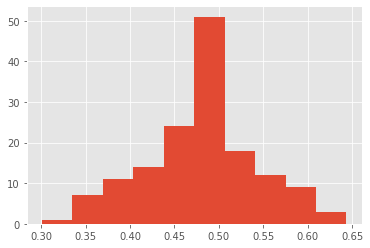

In [ ]:
plt.hist(np.log10(df.sepal_width))
# нормальное распределение (гипотеза [0])

In [ ]:
res=stats.shapiro(np.log10(df.sepal_width))
print('p-value:',res[1])
# p-value значительно больше 0.05,
# значит [0] гипотезу о том, что распределение нормальное не отвергаем (с учетом того,
# что число оч. большое вероятность гипотезы [0] очень велика)

p-value: 0.2606344521045685


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  4.,  0.,  0.,  3.,  0.,
         0.,  8.,  0.,  5.,  0.,  0.,  9.,  0., 14.,  0., 10.,  0., 26.,
         0., 12.,  0., 13.,  0.,  6.,  0., 12.,  0.,  6.,  0.,  3.,  0.,
         3.,  6.,  0.,  2.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([0.30103   , 0.30787845, 0.3147269 , 0.32157536, 0.32842381,
        0.33527226, 0.34212072, 0.34896917, 0.35581762, 0.36266608,
        0.36951453, 0.37636299, 0.38321144, 0.39005989, 0.39690835,
        0.4037568 , 0.41060525, 0.41745371, 0.42430216, 0.43115061,
        0.43799907, 0.44484752, 0.45169598, 0.45854443, 0.46539288,
        0.47224134, 0.47908979, 0.48593824, 0.4927867 , 0.49963515,
        0.5064836 , 0.51333206, 0.52018051, 0.52702897, 0.53387742,
        0.54072587, 0.54757433, 0.55442278, 0.56127123, 0.56811969,
        0.57496814, 0.58181659, 0.58866505, 0.5955135 , 0.60236195,
        0.60921041, 0.61605886, 0.62290732, 0.62975577, 0.63660422,
        0.64345268]),
 <a list of 50

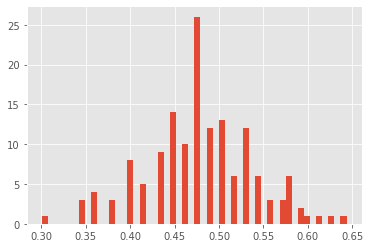

In [ ]:
plt.hist(np.log10(df.sepal_width), bins=50)
# увеличтм дискретность и увидим пенечки (выбросы),
# местами ненормально, а так, в целом, нормально

In [ ]:
res=stats.shapiro(df.sepal_width)
print('p-value:',res[1])
# [0] гипотеза не отвергается, но не так явно, как после логарифмирования

p-value: 0.0751834362745285


(array([ 1.,  0.,  0.,  0.,  3.,  0.,  4.,  0.,  3.,  0.,  8.,  0.,  5.,
         0.,  9.,  0., 14.,  0., 10.,  0., 26.,  0., 12.,  0.,  0., 13.,
         0.,  6.,  0., 12.,  0.,  6.,  0.,  3.,  0.,  3.,  0.,  6.,  0.,
         2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([2.   , 2.048, 2.096, 2.144, 2.192, 2.24 , 2.288, 2.336, 2.384,
        2.432, 2.48 , 2.528, 2.576, 2.624, 2.672, 2.72 , 2.768, 2.816,
        2.864, 2.912, 2.96 , 3.008, 3.056, 3.104, 3.152, 3.2  , 3.248,
        3.296, 3.344, 3.392, 3.44 , 3.488, 3.536, 3.584, 3.632, 3.68 ,
        3.728, 3.776, 3.824, 3.872, 3.92 , 3.968, 4.016, 4.064, 4.112,
        4.16 , 4.208, 4.256, 4.304, 4.352, 4.4  ]),
 <a list of 50 Patch objects>)

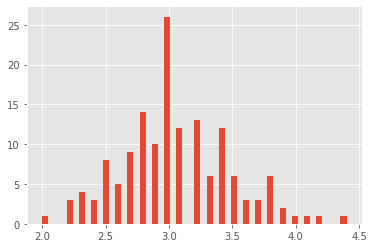

In [ ]:
plt.hist(df.sepal_width, bins=50)
# неплохой график

# **Раздел 2. Критерий Манна-Уитни. Сравнение медиан petal_length и petal_width**

**U-критерий Манна — Уитни** — статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками.

In [ ]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
8,4.4,2.9,1.4,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
38,4.4,3.0,1.3,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa


**6. Замените значение -9999, которое здесь употребляется в качестве пустого значения, на корректное пустое значение nan из модуля numpy. Воспользуйтесь при этом функцией replace(). Выведите на экран первые 5 наблюдений преобразованных данных.**

In [ ]:
df=df.replace(-9999,np.nan) # заменяет -9999 данные на nan
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x=df[df['class']=='Iris-virginica'].petal_width
y=df[df['class']=='Iris-versicolor'].petal_width
x.name, y.name = 'Iris-virginica', 'Iris-versicolor'

In [ ]:
def two_histograms(x,y):
  x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
  y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
  plt.axvline(x.mean(),color='red',alpha=0.8,linestyle='dashed') # рисует среднюю линию
  plt.axvline(y.mean(),color='blue',alpha=0.8,linestyle='dashed') # рисует среднюю линию
  plt.legend([x.name, y.name]) # аннотация в верхнем правом углу

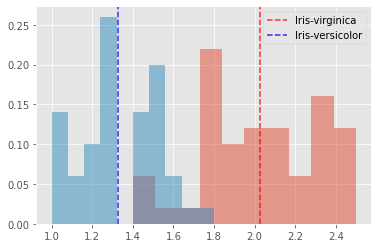

In [ ]:
two_histograms(x,y)
# распределения ненормальные, поэтому среднее сравнивать нельзя, только медиану

**9. Сравните медианы двух выборок на основе критерия Манна-Уитни. Воспользуйтесь при этом функцией mannwhitneyu() из модуля scipy.stats. Прокомментируйте результат.**

In [ ]:
# [0] гипотеза  - медианы равны !!!!!!!!!!!!!!!!

In [ ]:
res=stats.mannwhitneyu(x,y)
print('p-value:',res[1])
# т.к. p-value очень мало, то [0] гипотезу о равенстве медиан отвергаем

p-value: 4.8490227224570924e-17


# **Раздел 3. Одновыборочный критерий Стьюдента. Оценка способности к подавлению испульсивных поведенческих реакций**

**Критерий Стьюдента t** относится к одному из наиболее давно разработанных и широко используемых методов статистики. Чаще всего он применяется для проверки нулевой гипотезы о равенстве средних значений двух совокупностей, хотя *существует также и одновыборочная модификация этого метода*.

ДОПУЩЕНИЯ:
- Сравниваемые выборки должны происходить из нормально распределенных совокупностей;
- Дисперсии сравниваемых генеральных совокупностей должны быть равны.

**ОПРЕДЕЛЕНИЕ:**
Одновыборочный t-критерий
Этот вариант критерия Стьюдента служит для проверки нулевой гипотезы о равенстве среднего значения (
m
u
1
) генеральной совокупности, из которой была взята выборка, некоторому известному значению (
m
u
0
):

**по заданию сравниваем среднее заначение выборки с каким-то известным числом,  возьмем 5**

**[0] гипотеза, что они равны**

In [ ]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
124,6.7,3.3,5.7,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
82,5.8,2.7,3.9,1.2,Iris-versicolor
32,5.2,4.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa


In [ ]:
# будем оценивать параметр df.sepal_width, т.к. ранее выяснилось, что распределение у него нормальное,  вроде это необходимо

In [ ]:
i = round(df.sepal_width.mean(),3)
i

3.054

In [ ]:
i = df[df['class']=='Iris-setosa'].sepal_width
stats.ttest_1samp(i, 5)
# [0] гипотеза о равенстве среднего выборки и числа 5 отвергается, т.к. p-value значительно меньше 0.05

Ttest_1sampResult(statistic=-29.35882672715725, pvalue=9.299213201327012e-33)

# **Раздел 4. Критерий Стьюдента для независимых выборок. Возраст, в котором умирают европейские аристократы**

**13. Данные содержат информацию о продолжительности жизни следующих классов: суверенитет ('sovr'), аристократия ('aris') и дворянство. Сохраните в отдельные переменные выборки, которые собираетесь сравнивать, а именно в переменную  – возраст смерти класса 'sovr', а в переменную  – возраст смерти класса 'aris'.**

**Критерий t Стьюдента для независимых выборок** -критерий Стьюдента для независимых выборок применяется для сравнения средних значений двух независимых между собой выборок.

**Условия применения:**

- cравниваемые значения не составляют пару коррелирующих значений

- распределение признаков в каждой выборке соответствует нормальному распределению

- дисперсии признака в выборках примерно равны (проверяется с помощью критерия F-Фишера).

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/PDA-200/agedeath.dat.txt',sep='\s+',header=None, names=['group','age','index'])
df.sample(5)

,group,age,index
759,aris,53,760
128,aris,29,129
2472,gent,27,182
4250,gent,73,1960
4379,gent,76,2089


In [ ]:
x=df[df['group']=='sovr']['age']
y=df[df['group']=='aris']['age']
x.name, y.name = 'sovr', 'aris'

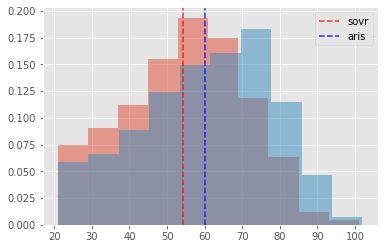

In [ ]:
two_histograms(x,y)

**16. Проверьте гипотезу о равенстве дисперсий на основе критерия Флигнера-Килина. Воспользуйтесь при этом функцией fligner() из модуля scipy.stats. Прокомментируйте результат.**

In [ ]:
stats.fligner(x,y) # pvalue малоб отвергаем [0] гипотезу о равенстве дисперсий

FlignerResult(statistic=15.114917017895495, pvalue=0.00010116077103844913)

Проверьте гипотезу о равенстве средних значений двух независимых классов на основе критерия Стьюдента для независимых выборок. Воспользуйтесь при этом функцией ttest_ind() из модуля scipy.stats. Прокомментируйте результат.

In [ ]:
stats.ttest_ind(x,y,equal_var=False) # equal_var=False указываем, что дисперсии не равны
# [0] гипотеза отвергается, средние не равны

Ttest_indResult(statistic=-10.758106583586057, pvalue=1.5181184197728794e-26)

# **Раздел 5. Критерий Стьюдента для парных выборок. Скорость чтения названий цветов**

**17. Загрузите данные из файла interference.csv с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().**

**Парный t-критерий Стьюдента** используется для сравнения двух зависимых (парных) выборок. Зависимыми являются измерения, выполненные у одних и тех же пациентов, но в разное время, например, артериальное давление у больных гипертонической болезнью до и после приема антигипертензивного препарата. Нулевая гипотеза гласит об отсутствии различий между сравниваемыми выборками, альтернативная - о наличии статистически значимых различий.

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/PDA-200/interference.csv')
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


In [ ]:
x=df['DiffCol']
y=df['Black']
x.name, y.name = 'DiffCol', 'Black'

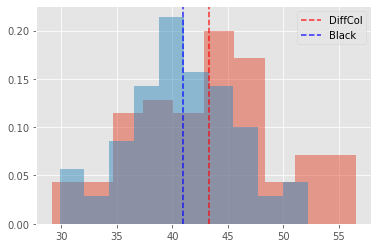

In [ ]:
two_histograms(x,y)

**19. Проверьте гипотезу о равенстве средних значений двух зависимых выборок на основе критерия Стьюдента для зависимых выборок. Воспользуйтесь при этом функцией ttest_rel() из модуля**

In [ ]:
stats.ttest_rel(x,y)

Ttest_relResult(statistic=2.463853781331113, pvalue=0.0162416779538072)

# **Раздел 6. Критерий хи-квадрат. Популярность кандидата**

**20. В регионе ожидаются выборы. Команда кандидата проводит опрос, в результате которого в поддержку кандидата выказалось 28% из 100 опрошенных в городе и 20% из 100 опрошенных на селе. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли разворачивать дополнительную рекламную кампанию на селе. Проверять гипотезу о равенстве распределений будем с использованием критерия хи-квадрат.**


**21. Сначала постройте таблицу сопряжённости, в которой будут указаны доли высказавшихся за ('for') и против ('against') кандидата в разрезе города ('city') и села ('country'). Воспользуйтесь при этом функцией DataFrame() из модуля pandas. Выведите ее на экран.**


In [ ]:
table=pd.DataFrame([[28,72],[20,80]],index=['city','country'],columns=['for','against'])
table

,for,against
city,28,72
country,20,80


**22. На основе таблицы сопряженности проверьте с помощью критерия хи-квадрат гипотезу о равенстве долей респондентов, высказавшихся за и против кандидата. Воспользуйтесь при этом функцией chi2_contingency() из модуля scipy.stats. Прокомментируйте**

In [ ]:
stats.chi2_contingency(table)
# 0.24 - это p-value
# 1.34 - это хи-квадрат

(1.3432017543859647, 0.2464701206916715, 1, array([[24., 76.],
        [24., 76.]]))

# **Раздел 7. Коэффициент корреляции Пирсона. Взаимосвязь цены и площади домов в Альбукерке**

**23. агрузите данные из файла Albuquerque Home Prices_data.txt с помощью функции read_csv() из модуля pandas. Замените значение -9999, которое здесь употребляется в качестве пустого значения, на корректное пустое значение nan из модуля numpy. Воспользуйтесь при этом функцией replace(). Выведите на экран первые 5 наблюдений преобразованных данных.**


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/PDA-200/Albuquerque Home Prices_data.txt',sep='\t')
df=df.replace(-9999,np.nan)
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


**24. Проверьте очевидный факт, что площадь дома коррелирует с его ценой. Постройте диаграмму рассеяния для переменных цена ('PRICE') и площадь дома ('SQFT'). Воспользуйтесь при этом функцией scatter() из модуля matplotlib.pyplot. Прокомментируйте полученный результат.**

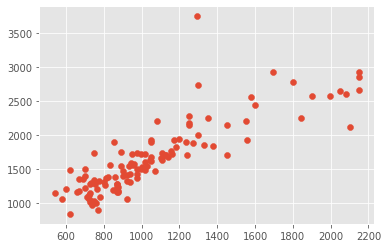

In [ ]:
plt.scatter(df['PRICE'],df['SQFT'])
# происутствует хорошая корреляция (прямая)

**25. Проверьте свою гипотезу аналитически с помощью коэффициента корреляции Пирсона. Воспользуйтесь при этом функцией pearsonr() из модуля scipy.stats. Прокомментируйте результат.**

In [ ]:
stats.pearsonr(df['PRICE'],df['SQFT'])
# коэфф корреляции 0.84 - это очень хорошая связь

(0.8447950985552124, 5.146345707629025e-33)